<a href="https://colab.research.google.com/github/ztarin/ml-project/blob/main/Perkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
# path = '/content/drive/MyDrive/your-folder/Parkinsons-Telemonitoring-ucirvine.csv'
df = pd.read_csv('/content/drive/MyDrive/Ml_project/Parkinsons-Telemonitoring-ucirvine.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df.shape       # number of rows and columns
df.info()      # data types and non-null counts
df.head()      # first 5 rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   bool   
 3   test_time      5875 non-null   float64
 4   motor_updrs    5875 non-null   float64
 5   total_updrs    5875 non-null   float64
 6   jitter         5875 non-null   float64
 7   jitter_abs     5875 non-null   float64
 8   jitter_rap     5875 non-null   float64
 9   jitter_ppq5    5875 non-null   float64
 10  jitter_ddp     5875 non-null   float64
 11  shimmer        5875 non-null   float64
 12  shimmer_db     5875 non-null   float64
 13  shimmer_apq3   5875 non-null   float64
 14  shimmer_apq5   5875 non-null   float64
 15  shimmer_apq11  5875 non-null   float64
 16  shimmer_dda    5875 non-null   float64
 17  nhr            5875 non-null   float64
 18  hnr     

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
TARGET = 'total_updrs'

X = df.drop(columns=['subject', 'motor_updrs', 'total_updrs'])
y = df[TARGET]

X.head()


,age,sex,test_time,jitter,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,72,False,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,False,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,False,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,False,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,False,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
print(X.shape, y.shape)


(5875, 19) (5875,)


In [ ]:
df.isnull().sum()


,0
subject,0
age,0
sex,0
test_time,0
motor_updrs,0
total_updrs,0
jitter,0
jitter_abs,0
jitter_rap,0
jitter_ppq5,0


In [ ]:
print(df.isnull().sum())


subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
print(df.isnull().sum())


subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64


In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
print(df.isnull().sum())

subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64


In [ ]:
TARGET = 'total_updrs'

X = df.drop(columns=['subject', 'motor_updrs', 'total_updrs'])
y = df[TARGET]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(df.describe())

           subject          age    test_time  motor_updrs  total_updrs  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936    92.863722    21.296229    29.018942   
std      12.372279     8.821524    53.445602     8.129282    10.700283   
min       1.000000    36.000000    -4.262500     5.037700     7.000000   
25%      10.000000    58.000000    46.847500    15.000000    21.371000   
50%      22.000000    65.000000    91.523000    20.871000    27.576000   
75%      33.000000    72.000000   138.445000    27.596500    36.399000   
max      42.000000    85.000000   215.490000    39.511000    54.992000   

            jitter   jitter_abs   jitter_rap  jitter_ppq5   jitter_ddp  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean      0.006154     0.000044     0.002987     0.003277     0.008962  ...   
std       0.005624     0.000036     0.003124     0.003732     0.009371  ...   
min       0.00083

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree -> MSE: {mse_dt:.3f}, R²: {r2_dt:.3f}')



Decision Tree -> MSE: 8.539, R²: 0.923


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest -> MSE: {mse_rf:.3f}, R²: {r2_rf:.3f}')


Random Forest -> MSE: 2.574, R²: 0.977


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPRegressor(random_state=42, max_iter=1000, learning_rate='adaptive', verbose=True)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Regressor -> MSE: {mse_mlp:.3f}, R²: {r2_mlp:.3f}')


Iteration 1, loss = 452.45284272
Iteration 2, loss = 415.36388510
Iteration 3, loss = 375.10832077
Iteration 4, loss = 332.63488140
Iteration 5, loss = 290.47080139
Iteration 6, loss = 252.36227749
Iteration 7, loss = 220.07802716
Iteration 8, loss = 194.09892477
Iteration 9, loss = 172.93589498
Iteration 10, loss = 154.95564043
Iteration 11, loss = 139.08684168
Iteration 12, loss = 125.26937146
Iteration 13, loss = 113.67118135
Iteration 14, loss = 104.29360361
Iteration 15, loss = 96.87907041
Iteration 16, loss = 91.01510210
Iteration 17, loss = 86.36692721
Iteration 18, loss = 82.34776524
Iteration 19, loss = 78.88261329
Iteration 20, loss = 75.86295108
Iteration 21, loss = 72.92340019
Iteration 22, loss = 70.33391127
Iteration 23, loss = 67.88021927
Iteration 24, loss = 65.63083032
Iteration 25, loss = 63.57637812
Iteration 26, loss = 61.68276100
Iteration 27, loss = 60.01314193
Iteration 28, loss = 58.41643558
Iteration 29, loss = 57.09045116
Iteration 30, loss = 55.81279946
Itera

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp = MLPRegressor(random_state=42, max_iter=2000, learning_rate='adaptive', verbose=True)


In [ ]:
mlp = MLPRegressor(random_state=42, max_iter=2000, learning_rate='adaptive',
                   early_stopping=True, n_iter_no_change=10, verbose=True)


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=2000, learning_rate='adaptive', early_stopping=True, verbose=True)


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=2000, solver='lbfgs', verbose=True)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=2000,
    learning_rate='adaptive',
    early_stopping=True,
    n_iter_no_change=10,
    verbose=True
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Regressor -> MSE: {mse_mlp:.3f}, R²: {r2_mlp:.3f}')


Iteration 1, loss = 456.17020555
Validation score: -6.525622
Iteration 2, loss = 368.15158429
Validation score: -4.602033
Iteration 3, loss = 254.52679544
Validation score: -2.683150
Iteration 4, loss = 171.88814219
Validation score: -1.557505
Iteration 5, loss = 124.07808250
Validation score: -0.910674
Iteration 6, loss = 91.19419883
Validation score: -0.591072
Iteration 7, loss = 75.58232179
Validation score: -0.445219
Iteration 8, loss = 68.52211677
Validation score: -0.363789
Iteration 9, loss = 63.70694730
Validation score: -0.267671
Iteration 10, loss = 59.96859694
Validation score: -0.206689
Iteration 11, loss = 56.97841409
Validation score: -0.155437
Iteration 12, loss = 54.78375748
Validation score: -0.121902
Iteration 13, loss = 53.13842397
Validation score: -0.066180
Iteration 14, loss = 51.45089610
Validation score: -0.037953
Iteration 15, loss = 50.32833186
Validation score: -0.015147
Iteration 16, loss = 49.20733872
Validation score: 0.008025
Iteration 17, loss = 48.46050

In [ ]:
results = {
    'Decision Tree': {'MSE': mse_dt, 'R2': r2_dt, 'y_pred': y_pred_dt},
    'Random Forest': {'MSE': mse_rf, 'R2': r2_rf, 'y_pred': y_pred_rf},
    'MLP Regressor': {'MSE': mse_mlp, 'R2': r2_mlp, 'y_pred': y_pred_mlp}
}


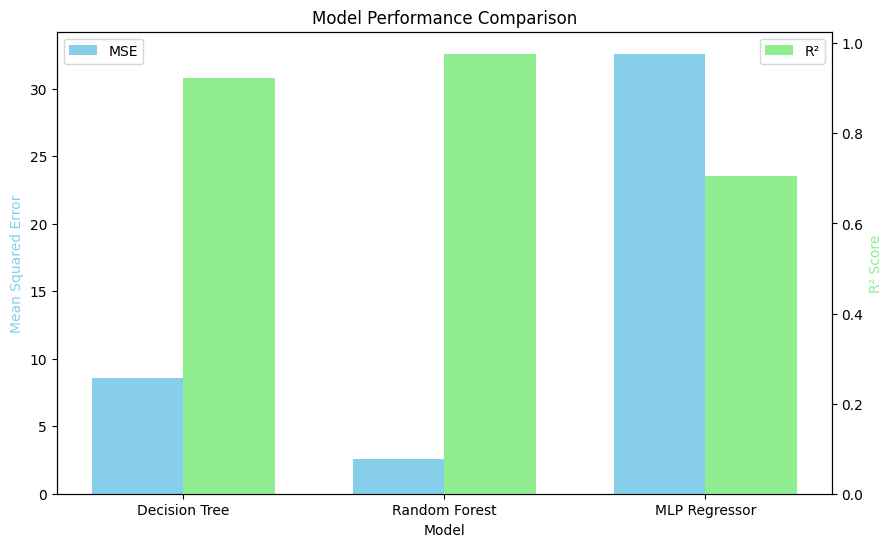

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = list(results.keys())
mse_values = [results[m]['MSE'] for m in models]
r2_values = [results[m]['R2'] for m in models]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

rects1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')

ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r2_values, width, label='R²', color='lightgreen')

ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error', color='skyblue')
ax2.set_ylabel('R² Score', color='lightgreen')
ax1.set_title('Model Performance Comparison')

ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


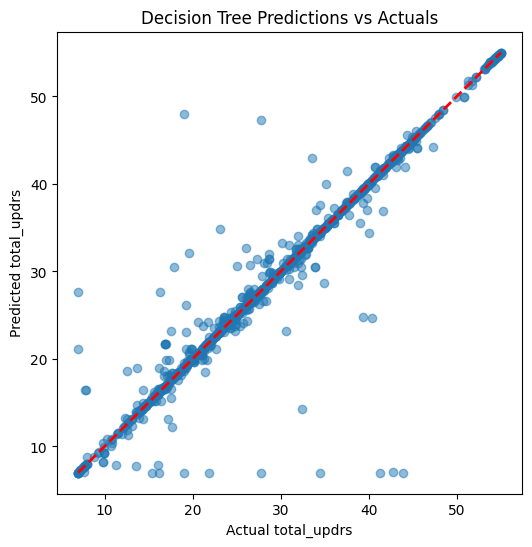

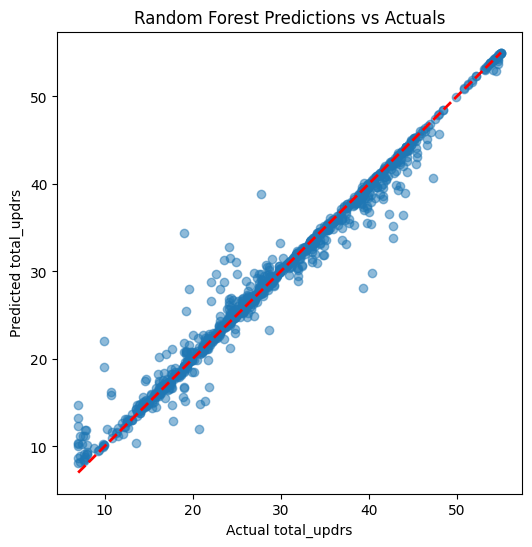

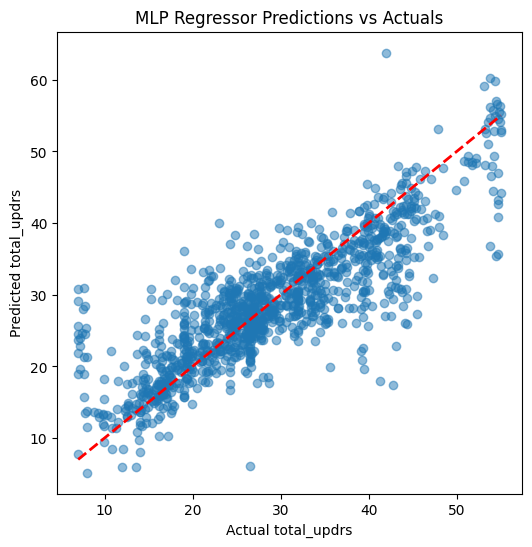

In [ ]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual total_updrs')
    plt.ylabel('Predicted total_updrs')
    plt.title(f'{model_name} Predictions vs Actuals')
    plt.show()

for model_name in models:
    plot_predictions(y_test, results[model_name]['y_pred'], model_name)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)


In [ ]:
search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,  # number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # use all CPU cores
)


In [ ]:
search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
print("Best parameters found:", search.best_params_)
print("Best CV MSE:", -search.best_score_)


Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV MSE: 4.551998662683354


In [ ]:
best_rf = search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Tuned Random Forest -> MSE: {mse_best_rf:.3f}, R²: {r2_best_rf:.3f}')


Tuned Random Forest -> MSE: 2.572, R²: 0.977


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)

search_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_grid_dt,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search_dt.fit(X_train, y_train)

print("Best Decision Tree params:", search_dt.best_params_)
print("Best CV MSE:", -search_dt.best_score_)

best_dt = search_dt.best_estimator_

y_pred_best_dt = best_dt.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print(f'Tuned Decision Tree -> MSE: {mean_squared_error(y_test, y_pred_best_dt):.3f}, '
      f'R²: {r2_score(y_test, y_pred_best_dt):.3f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Decision Tree params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Best CV MSE: 12.568142433060528
Tuned Decision Tree -> MSE: 8.955, R²: 0.919


In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization)
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

mlp = MLPRegressor(random_state=42)

search_mlp = RandomizedSearchCV(
    mlp,
    param_distributions=param_grid_mlp,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search_mlp.fit(X_train_scaled, y_train)

print("Best MLP params:", search_mlp.best_params_)
print("Best CV MSE:", -search_mlp.best_score_)

best_mlp = search_mlp.best_estimator_

y_pred_best_mlp = best_mlp.predict(X_test_scaled)

print(f'Tuned MLP -> MSE: {mean_squared_error(y_test, y_pred_best_mlp):.3f}, '
      f'R²: {r2_score(y_test, y_pred_best_mlp):.3f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best MLP params: {'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}
Best CV MSE: 26.458244333215518
Tuned MLP -> MSE: 15.705, R²: 0.858


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp = MLPRegressor(random_state=42, max_iter=500)


In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=2000,
    learning_rate='adaptive',
    alpha=0.01,
    activation='tanh',
    early_stopping=True,
    n_iter_no_change=10,
    verbose=True
)


In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=2000,
    learning_rate='adaptive',
    alpha=0.01,
    activation='tanh',
    early_stopping=True,
    n_iter_no_change=10,
    verbose=True
)


In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=1000,
    solver='lbfgs',
    alpha=0.01,
    activation='tanh',
    verbose=True
)



In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=1000,
    learning_rate='adaptive',
    alpha=0.01,
    activation='tanh',
    tol=1e-3,  # default is 1e-4, higher tol means stopping earlier
    early_stopping=True,
    n_iter_no_change=10,
    verbose=True
)


In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=2000,
    learning_rate='adaptive',
    alpha=0.01,
    activation='tanh',
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-4,
    verbose=True
)
mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 469.12586392
Validation score: -6.859260
Iteration 2, loss = 406.61213099
Validation score: -5.618672
Iteration 3, loss = 334.40846257
Validation score: -4.283759
Iteration 4, loss = 262.14235884
Validation score: -3.142239
Iteration 5, loss = 208.45383119
Validation score: -2.426437
Iteration 6, loss = 175.68062426
Validation score: -1.958458
Iteration 7, loss = 153.13411030
Validation score: -1.614873
Iteration 8, loss = 136.02627318
Validation score: -1.337829
Iteration 9, loss = 122.21307400
Validation score: -1.111312
Iteration 10, loss = 110.82061360
Validation score: -0.924257
Iteration 11, loss = 101.33150260
Validation score: -0.765353
Iteration 12, loss = 93.30712685
Validation score: -0.628710
Iteration 13, loss = 86.38056709
Validation score: -0.514470
Iteration 14, loss = 80.49389375
Validation score: -0.415113
Iteration 15, loss = 75.43887045
Validation score: -0.328579
Iteration 16, loss = 71.07780680
Validation score: -0.257292
Iteration 17, loss = 6

MLPRegressor(activation='tanh', alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(100, 50), learning_rate='adaptive',
             max_iter=2000, random_state=42, verbose=True)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=2000,
    learning_rate='adaptive',
    alpha=0.01,
    activation='tanh',
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-4,
    verbose=True
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Regressor -> MSE: {mse_mlp:.3f}, R²: {r2_mlp:.3f}')


Iteration 1, loss = 469.12586392
Validation score: -6.859260
Iteration 2, loss = 406.61213099
Validation score: -5.618672
Iteration 3, loss = 334.40846257
Validation score: -4.283759
Iteration 4, loss = 262.14235884
Validation score: -3.142239
Iteration 5, loss = 208.45383119
Validation score: -2.426437
Iteration 6, loss = 175.68062426
Validation score: -1.958458
Iteration 7, loss = 153.13411030
Validation score: -1.614873
Iteration 8, loss = 136.02627318
Validation score: -1.337829
Iteration 9, loss = 122.21307400
Validation score: -1.111312
Iteration 10, loss = 110.82061360
Validation score: -0.924257
Iteration 11, loss = 101.33150260
Validation score: -0.765353
Iteration 12, loss = 93.30712685
Validation score: -0.628710
Iteration 13, loss = 86.38056709
Validation score: -0.514470
Iteration 14, loss = 80.49389375
Validation score: -0.415113
Iteration 15, loss = 75.43887045
Validation score: -0.328579
Iteration 16, loss = 71.07780680
Validation score: -0.257292
Iteration 17, loss = 6

In [ ]:
results = {
    'Decision Tree': {'MSE': mean_squared_error(y_test, y_pred_best_dt), 'R2': r2_score(y_test, y_pred_best_dt), 'y_pred': y_pred_best_dt},
    'Random Forest': {'MSE': mean_squared_error(y_test, y_pred_best_rf), 'R2': r2_score(y_test, y_pred_best_rf), 'y_pred': y_pred_best_rf},
    'MLP Regressor': {'MSE': mse_mlp, 'R2': r2_mlp, 'y_pred': y_pred_mlp}
}


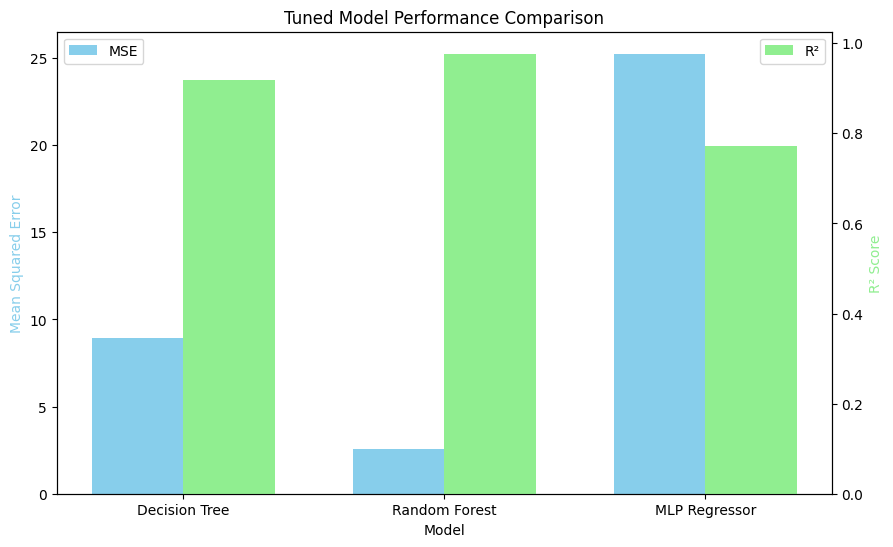

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = list(results.keys())
mse_values = [results[m]['MSE'] for m in models]
r2_values = [results[m]['R2'] for m in models]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

rects1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')

ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r2_values, width, label='R²', color='lightgreen')

ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error', color='skyblue')
ax2.set_ylabel('R² Score', color='lightgreen')
ax1.set_title('Tuned Model Performance Comparison')

ax1.set_xticks(x)
ax1.set_xticklabels(models)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


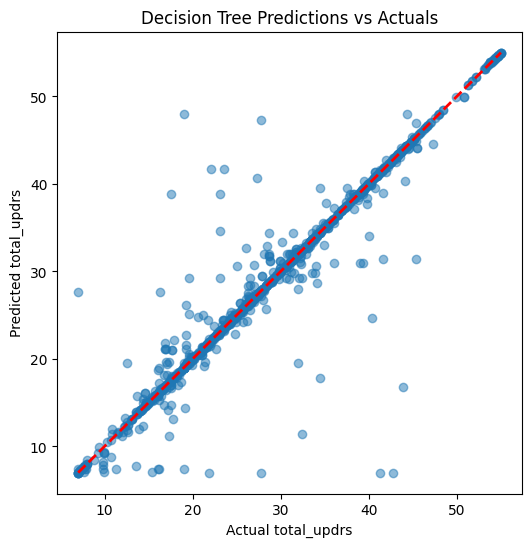

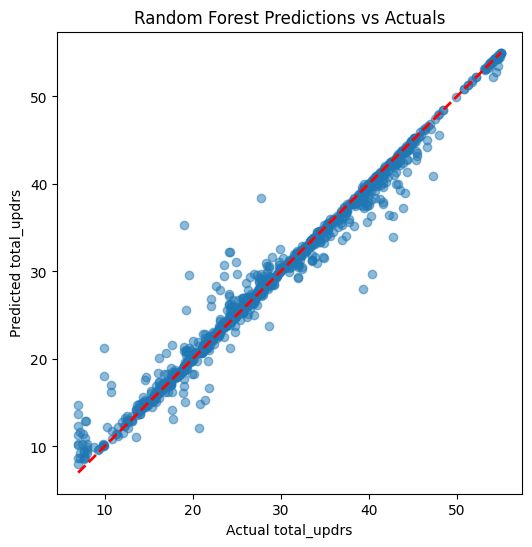

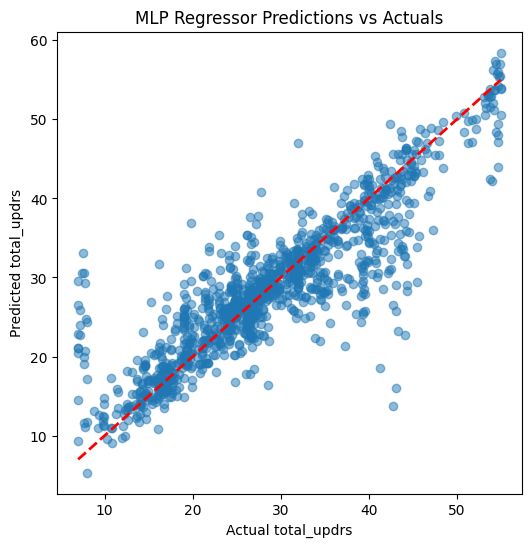

In [ ]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual total_updrs')
    plt.ylabel('Predicted total_updrs')
    plt.title(f'{model_name} Predictions vs Actuals')
    plt.show()

for model_name in models:
    plot_predictions(y_test, results[model_name]['y_pred'], model_name)


In [ ]:
import joblib

joblib.dump(best_dt, 'best_decision_tree.pkl')
joblib.dump(best_rf, 'best_random_forest.pkl')
joblib.dump(mlp, 'best_mlp.pkl')  # your final MLP model


['best_mlp.pkl']

In [ ]:
best_dt = joblib.load('best_decision_tree.pkl')
best_rf = joblib.load('best_random_forest.pkl')
mlp = joblib.load('best_mlp.pkl')


In [ ]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor([
    ('dt', best_dt),
    ('rf', best_rf),
    ('mlp', mlp)
])

ensemble.fit(X_train, y_train)



Iteration 1, loss = 397.40236114
Validation score: -4.644657
Iteration 2, loss = 279.20648084
Validation score: -3.664377
Iteration 3, loss = 243.69635657
Validation score: -3.208361
Iteration 4, loss = 220.89487080
Validation score: -2.829326
Iteration 5, loss = 201.08452325
Validation score: -2.494352
Iteration 6, loss = 183.66288992
Validation score: -2.196972
Iteration 7, loss = 168.12187179
Validation score: -1.931892
Iteration 8, loss = 154.25920481
Validation score: -1.692495
Iteration 9, loss = 141.83134861
Validation score: -1.479112
Iteration 10, loss = 130.75486998
Validation score: -1.289506
Iteration 11, loss = 120.93358806
Validation score: -1.120229
Iteration 12, loss = 112.21775019
Validation score: -0.967641
Iteration 13, loss = 104.45457638
Validation score: -0.835884
Iteration 14, loss = 97.68987313
Validation score: -0.719212
Iteration 15, loss = 91.75436571
Validation score: -0.614544
Iteration 16, loss = 86.47945961
Validation score: -0.524769
Iteration 17, loss =

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_split=5,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('mlp',
                             MLPRegressor(activation='tanh', alpha=0.01,
                                          early_stopping=True,
                                          hidden_layer_sizes=(100, 50),
                                          learning_rate='adaptive',
                                          max_iter=2000, random_state=42,
                                          verbose=True))])

In [ ]:
ensemble.fit(X_train_scaled, y_train)


Iteration 1, loss = 469.12586392
Validation score: -6.859260
Iteration 2, loss = 406.61213099
Validation score: -5.618672
Iteration 3, loss = 334.40846257
Validation score: -4.283759
Iteration 4, loss = 262.14235884
Validation score: -3.142239
Iteration 5, loss = 208.45383119
Validation score: -2.426437
Iteration 6, loss = 175.68062426
Validation score: -1.958458
Iteration 7, loss = 153.13411030
Validation score: -1.614873
Iteration 8, loss = 136.02627318
Validation score: -1.337829
Iteration 9, loss = 122.21307400
Validation score: -1.111312
Iteration 10, loss = 110.82061360
Validation score: -0.924257
Iteration 11, loss = 101.33150260
Validation score: -0.765353
Iteration 12, loss = 93.30712685
Validation score: -0.628710
Iteration 13, loss = 86.38056709
Validation score: -0.514470
Iteration 14, loss = 80.49389375
Validation score: -0.415113
Iteration 15, loss = 75.43887045
Validation score: -0.328579
Iteration 16, loss = 71.07780680
Validation score: -0.257292
Iteration 17, loss = 6

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(max_depth=20,
                                                   min_samples_leaf=2,
                                                   random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_split=5,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('mlp',
                             MLPRegressor(activation='tanh', alpha=0.01,
                                          early_stopping=True,
                                          hidden_layer_sizes=(100, 50),
                                          learning_rate='adaptive',
                                          max_iter=2000, random_state=42,
                                          verbose=True))])

In [ ]:
y_pred_ensemble = ensemble.predict(X_test_scaled)


In [ ]:
models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'MLP Regressor': mlp,
    'Ensemble': ensemble
}

results = {}

for name, model in models.items():
    if name in ['MLP Regressor', 'Ensemble']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2, 'y_pred': y_pred}
    print(f"{name}: MSE = {mse:.3f}, R2 = {r2:.3f}")


Decision Tree: MSE = 8.955, R2 = 0.919
Random Forest: MSE = 2.572, R2 = 0.977
MLP Regressor: MSE = 25.247, R2 = 0.772
Ensemble: MSE = 5.981, R2 = 0.946


In [ ]:
import joblib

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Save the scaler too if your model uses scaled features (MLP does)
joblib.dump(scaler, 'scaler.pkl')  # scaler = your StandardScaler() fitted on training data



['scaler.pkl']

In [ ]:
features = ['subject', 'age', 'sex', 'test_time', 'motor_updrs', 'jitter', 'jitter_abs', 'jitter_rap', 'jitter_ppq5',
            'jitter_ddp', 'shimmer', 'shimmer_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda',
            'nhr', 'hnr', 'rpde', 'dfa', 'ppe']


In [ ]:
sample_data = {
    'age': [65],
    'sex': [True],
    'test_time': [5.0],
    'jitter': [0.003],
    'jitter_abs': [0.002],
    'jitter_rap': [0.001],
    'jitter_ppq5': [0.0008],
    'jitter_ddp': [0.002],
    'shimmer': [0.01],
    'shimmer_db': [0.9],
    'shimmer_apq3': [0.005],
    'shimmer_apq5': [0.007],
    'shimmer_apq11': [0.006],
    'shimmer_dda': [0.02],
    'nhr': [0.04],
    'hnr': [15.0],
    'rpde': [0.6],
    'dfa': [0.7],
    'ppe': [0.5]
}


In [ ]:
features = ['age', 'sex', 'test_time', 'jitter', 'jitter_abs', 'jitter_rap', 'jitter_ppq5',
            'jitter_ddp', 'shimmer', 'shimmer_db', 'shimmer_apq3', 'shimmer_apq5',
            'shimmer_apq11', 'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']



In [ ]:
input_df = pd.DataFrame(sample_data)
input_df = input_df[features]  # reorder columns exactly as training data features


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)  # X_train is your training features DataFrame



StandardScaler()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'MLP Regressor': mlp
}

# If you have ensemble, add it here:
# models['Ensemble'] = ensemble

results = {}

for name, model in models.items():
    # Use scaled features for MLP, normal for others
    if name == 'MLP Regressor':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2, 'y_pred': y_pred}
    print(f"{name}: MSE = {mse:.3f}, R2 = {r2:.3f}")



Decision Tree: MSE = 8.955, R2 = 0.919
Random Forest: MSE = 2.572, R2 = 0.977
MLP Regressor: MSE = 25.247, R2 = 0.772


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# For Decision Tree
cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring=mse_scorer)
print("Decision Tree CV MSE scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())



Decision Tree CV MSE scores: [321.71275765 202.95674163 109.53668554 173.32992569 273.69088226]
Mean CV MSE: 216.24539855395489


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)  # or a new MLPRegressor instance
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring=mse_scorer)
print("MLP CV MSE scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())


Iteration 1, loss = 451.85869601
Validation score: -6.398657
Iteration 2, loss = 390.32911709
Validation score: -5.241479
Iteration 3, loss = 318.57900765
Validation score: -3.985424
Iteration 4, loss = 248.98472000
Validation score: -2.955741
Iteration 5, loss = 198.65345189
Validation score: -2.307535
Iteration 6, loss = 167.51251673
Validation score: -1.873657
Iteration 7, loss = 145.98602904
Validation score: -1.552297
Iteration 8, loss = 129.71031738
Validation score: -1.294259
Iteration 9, loss = 116.58419771
Validation score: -1.086965
Iteration 10, loss = 105.95106181
Validation score: -0.908494
Iteration 11, loss = 96.87448641
Validation score: -0.760414
Iteration 12, loss = 89.34850112
Validation score: -0.629628
Iteration 13, loss = 82.85007670
Validation score: -0.519309
Iteration 14, loss = 77.32203916
Validation score: -0.425406
Iteration 15, loss = 72.71304434
Validation score: -0.346576
Iteration 16, loss = 68.74040135
Validation score: -0.272673
Iteration 17, loss = 65

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
best_dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 469.12586392
Validation score: -6.859260
Iteration 2, loss = 406.61213099
Validation score: -5.618672
Iteration 3, loss = 334.40846257
Validation score: -4.283759
Iteration 4, loss = 262.14235884
Validation score: -3.142239
Iteration 5, loss = 208.45383119
Validation score: -2.426437
Iteration 6, loss = 175.68062426
Validation score: -1.958458
Iteration 7, loss = 153.13411030
Validation score: -1.614873
Iteration 8, loss = 136.02627318
Validation score: -1.337829
Iteration 9, loss = 122.21307400
Validation score: -1.111312
Iteration 10, loss = 110.82061360
Validation score: -0.924257
Iteration 11, loss = 101.33150260
Validation score: -0.765353
Iteration 12, loss = 93.30712685
Validation score: -0.628710
Iteration 13, loss = 86.38056709
Validation score: -0.514470
Iteration 14, loss = 80.49389375
Validation score: -0.415113
Iteration 15, loss = 75.43887045
Validation score: -0.328579
Iteration 16, loss = 71.07780680
Validation score: -0.257292
Iteration 17, loss = 6

MLPRegressor(activation='tanh', alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(100, 50), learning_rate='adaptive',
             max_iter=2000, random_state=42, verbose=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# If you have tuned hyperparameters, use them here:
best_rf = RandomForestRegressor(
    n_estimators=100,  # or your best found value
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

# Train the model on training data
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have these trained models:
# best_dt (Decision Tree), best_rf (Random Forest), mlp (MLP Regressor)
# Also, X_test, y_test are your test sets
# And X_test_scaled is the scaled version of X_test for MLP

models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'MLP Regressor': mlp
}

for name, model in models.items():
    if name == 'MLP Regressor':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Test MSE: {mse:.3f}")
    print(f"{name} Test R²: {r2:.3f}")
    print('-' * 30)


Decision Tree Test MSE: 8.955
Decision Tree Test R²: 0.919
------------------------------
Random Forest Test MSE: 2.958
Random Forest Test R²: 0.973
------------------------------
MLP Regressor Test MSE: 25.247
MLP Regressor Test R²: 0.772
------------------------------


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")



MSE: 1222.465
RMSE: 34.964
MAE: 32.726
R²: -10.032


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
